In [1]:
import pandas as pd
import graphviz
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics

In [2]:
#讀取CSV檔案
data = pd.read_csv('glass.csv')

In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.00,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.00,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,'build wind non-float'
5,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,'build wind non-float'
6,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.00,0.00,'vehic wind float'
7,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00,'build wind float'
8,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,headlamps
9,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.00,0.28,'build wind non-float'


## 切分input 和output

In [4]:
#x:input
x=data.loc[:,['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
#y:output
y=data.loc[:,['Type']]

## 轉換屬性及標籤型別

In [5]:
#轉換屬性型態
#將屬性轉為數字label
le = preprocessing.LabelEncoder()

X_RI_encoded=le.fit_transform(x.RI)
X_Na_encoded=le.fit_transform(x.Na)
X_Mg_encoded=le.fit_transform(x.Mg)
X_Al_encoded=le.fit_transform(x.Al)
X_Si_encoded=le.fit_transform(x.Si)
X_K_encoded=le.fit_transform(x.K)
X_Ca_encoded=le.fit_transform(x.Ca)
X_Ba_encoded=le.fit_transform(x.Ba)
X_Fe_encoded=le.fit_transform(x.Fe)

#將play轉為數字label

Y_Type_label=le.fit_transform(y.Type)

#將屬性合併
#變成list
feature=list(zip(X_RI_encoded, X_Na_encoded,X_Mg_encoded,X_Al_encoded,X_Si_encoded,X_K_encoded,X_Ca_encoded,X_Ba_encoded,X_Fe_encoded))

#轉成array
import numpy as np
features=np.asarray(feature)

## 切分訓練集與資料集

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y_Type_label, test_size=0.34)

## sklearn: DecisionTreeClassifier

In [7]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=10,max_leaf_nodes = 12)
weather_clf = clf.fit(X_train,y_train)

## 測試模型

In [8]:
predicted = weather_clf.predict(X_test)

# 驗證準確度
accuracy = metrics.accuracy_score(predicted, y_test)
print(accuracy)

0.6164383561643836


## 產生決策樹圖形

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("glass") 

'glass.pdf'

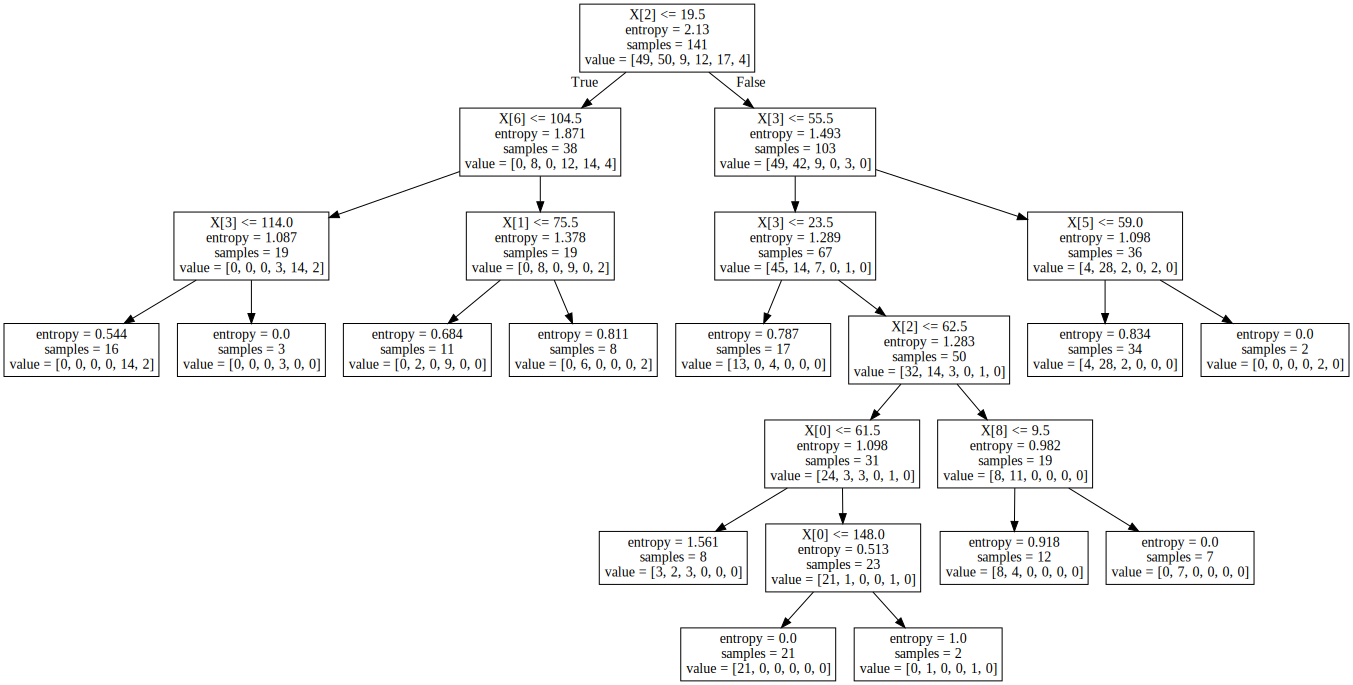

In [10]:
graph